In [3]:
!pip3 install coolprop
!pip3 install pandas
!pip3 install --upgrade git+https://github.com/ptgodart/nasaPoly.git
from CoolProp.constants import PT_INPUTS
import CoolProp as cp
import numpy as np
from matplotlib import pyplot as plt
import nasaPoly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ptgodart/nasaPoly.git to /tmp/pip-req-build-vguebc92
  Running command git clone -q https://github.com/ptgodart/nasaPoly.git /tmp/pip-req-build-vguebc92


# Anaerobic Sequencing Batch Reactor (ASBR) Cycle
Modelling electrical energy and biogas yield

# Efficiency Evaluation of Biogas Applications as Fuel
A side-by-side comparison with existing nonrenewable fuel sources

In [43]:
# Parameterization & Initialization

Temperature = 298.15 # K

Coal = nasaPoly.Species('C')
O2 = nasaPoly.Species('O2')
CO2 = nasaPoly.Species('CO2')
C8H18 = nasaPoly.Species('C8H18(L),isooct')
H2O_g = nasaPoly.Species('H2O')
C3H8 = nasaPoly.Species('C3H8')
CH4 = nasaPoly.Species('CH4')

molar_energies = list()
carbon_intensities = list()

In [44]:
# Biogas combustion efficiency
# combustion energy yield per one mole of biogas under constant pressure
# ---------------------------------------------------
# Based on a separation of species in biogas to 98% CH4, 2.0% CO2
# 9.8 * CH4 + 0.2 * CO2 + 19.6 * O2 -> (9.8 + 0.2) * CO2 + 19.6 * H2O(g)
h_products = 10 * CO2.h_0(Temperature) + 19.6 * H2O_g.h_0(Temperature) # J/mol
h_reactants = 9.8 * CH4.h_0(Temperature) + 0.2 * CO2.h_0(Temperature) + 19.6 * 0 # J/mol
q_p_CH4 = abs(h_products - h_reactants) / (9.8 * 1000) # kJ/mol --> LHV as gaseous H2O is 
print(f"The energy released by the combustion of a 98% CH4 biogas sample is {q_p_CH4:.3f} kJ/mol.")

# Carbon intensity of C3H8 combustion
# ---------------------------------------------------
# I_CO2 = m_CO2 / q_p 
I_CO2_CH4 = 10 * CO2.molecular_wt / (q_p_CH4) # g_CO2 / k
print(f"The carbon intensity of a 98% CH4 biogas sample's combustion is {I_CO2_CH4:.3f} g of CO2/kJ.\n")

# Coal combustion efficiency
# combustion energy yield per one mole of coal under constant pressure
# ---------------------------------------------------
# C(s) + O2 -> CO2
h_products = CO2.h_0(Temperature) # J/mol
h_reactants = 0 + 0 # J/mol
q_p_coal = abs(h_products - h_reactants) / 1000 # kJ/mol
print(f"The energy released by the combustion of coal is {q_p_coal:.3f} kJ/mol.")

# Carbon intensity of coal combustion
# ---------------------------------------------------
# I_CO2_coal = m_CO2 / q_p_coal 
I_CO2_coal = 1 * CO2.molecular_wt / q_p_coal # g_CO2 / kJ
print(f"The carbon intensity of coal combustion is {I_CO2_coal:.3f} g of CO2/kJ.\n")

# Petrol (Octane) combustion efficiency
# combustion energy yield per one mole of C8H18 under constant pressure
# ---------------------------------------------------
# 2 * C8H18 + 25 * O2 -> 16 * CO2 + 18 * H2O(g)
h_products = 16 * CO2.h_0(Temperature) + 18 * H2O_g.h_0(Temperature) # J/mol
h_reactants = 2 * C8H18.h_0(Temperature) + 25 * 0 # J/mol
q_p_C8H18 = abs(h_products - h_reactants) / (2 * 1000) # kJ/mol --> LHV as gaseous H2O is produced
print(f"The energy released by the combustion of C8H18 is {q_p_C8H18:.3f} kJ/mol.")

# Carbon intensity of C8H18 combustion
# ---------------------------------------------------
# I_CO2 = m_CO2 / q_p 
I_CO2_C8H18 = 16 * CO2.molecular_wt / (q_p_C8H18) # g_CO2 / k
print(f"The carbon intensity of C8H18 combustion is {I_CO2_C8H18:.3f} g of CO2/kJ.\n")

# Propane combustion efficiency
# combustion energy yield per one mole of C3H8 under constant pressure
# ---------------------------------------------------
# C3H8(g) + 5 * O2 -> 3 * CO2 + 4 * H2O(g)
h_products = 3 * CO2.h_0(Temperature) + 4 * H2O_g.h_0(Temperature) # J/mol
h_reactants = C3H8.h_0(Temperature) + 5 * 0 # J/mol
q_p_C3H8 = abs(h_products - h_reactants) / 1000 # kJ/mol --> LHV as gaseous H2O is produced
print(f"The energy released by the combustion of C8H18 is {q_p_C3H8:.3f} kJ/mol.")

# Carbon intensity of C3H8 combustion
# ---------------------------------------------------
# I_CO2 = m_CO2 / q_p 
I_CO2_C3H8 = 3 * CO2.molecular_wt / (q_p_C3H8) # g_CO2 / k
print(f"The carbon intensity of biogas combustion is {I_CO2_C3H8:.3f} g of CO2/kJ.\n")

The energy released by the combustion of a 98% CH4 biogas sample is 802.561 kJ/mol.
The carbon intensity of a 98% CH4 biogas sample's combustion is 0.548 g of CO2/kJ.

The energy released by the combustion of coal is 393.510 kJ/mol.
The carbon intensity of coal combustion is 0.112 g of CO2/kJ.

The energy released by the combustion of C8H18 is 5065.348 kJ/mol.
The carbon intensity of C8H18 combustion is 0.139 g of CO2/kJ.

The energy released by the combustion of C8H18 is 2043.152 kJ/mol.
The carbon intensity of biogas combustion is 0.065 g of CO2/kJ.



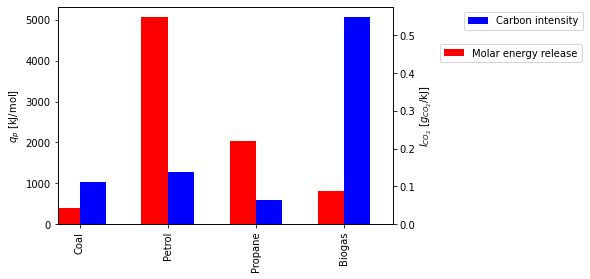

In [45]:
# graphing hehe
import pandas as pd
from io import StringIO

energies = [q_p_coal, q_p_C8H18, q_p_C3H8, q_p_CH4]
intensities = [I_CO2_coal, I_CO2_C8H18, I_CO2_C3H8, I_CO2_CH4]
data_blob = StringIO(f'''    energies    intensities
Coal    {energies[0]}    {intensities[0]}
Petrol    {energies[1]}    {intensities[1]}
Propane    {energies[2]}    {intensities[2]}
Biogas    {energies[3]}    {intensities[3]}
''')
df = pd.read_csv(data_blob, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

df.energies.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.intensities.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
bars = ["Molar energy release", "Carbon intensity"]
ax.set_ylabel('$q_p$ [kJ/mol]')
ax2.set_ylabel('$I_{CO_2}$ [$g_{CO_2}$/kJ]')
ax.legend(["Molar energy release"], bbox_to_anchor=(1.58, 0.85))
ax2.legend(["Carbon intensity"], bbox_to_anchor=(1.2, 1))
plt.show()